In [438]:
import random
import matplotlib.pyplot as plt
import numpy as np

n = 500

doors = [0, 0, 0]
prize_index = random.choice([0,1,2])
user_choice = [random.choice([0,1,2]), random.choice(['switch', 'stay'])]
doors[prize_index] = 1

In [439]:
def judge(doors, user_choice):
    score = 5
    if user_choice[1] == 'switch' and doors[user_choice[0]] == 1:
        score = 0
    if user_choice[1] == 'switch' and doors[user_choice[0]] == 0:
        score = 1
    if user_choice[1] == 'stay':
        score = 1 if doors[user_choice[0]] == 1 else 0
    return score

In [440]:
switch_wins = [0]
switch_total = 0
stay_wins = [0]
stay_total = 0

switch_win_ratio = []
stay_win_ratio = []

for i in range(0, n):
    doors = [0, 0, 0]
    prize_index = random.choice([0,1,2])
    user_choice = [random.choice([0,1,2]), random.choice(['switch', 'stay'])]
    doors[prize_index] = 1

    if(user_choice[1] == 'switch'):
        switch_total = switch_total + 1
        if (judge(doors, user_choice) == 1):
            switch_wins.append(switch_wins[-1] + 1)
    if(user_choice[1] == 'stay'):
        stay_total = stay_total + 1
        if (judge(doors, user_choice) == 1):
            stay_wins.append(stay_wins[-1] + 1)
    
    if switch_total != 0:
        switch_win_ratio.append(switch_wins[-1]/switch_total)
    if stay_total != 0:
        stay_win_ratio.append(stay_wins[-1]/stay_total)

In [441]:
cumulative_wins_switch = np.cumsum(switch_win_ratio)
cumulative_wins_stay = np.cumsum(stay_win_ratio)


print(f'times: {n}')
print(f'switch wins: {switch_wins[-1]}')
print(f'switch total: {switch_total}')
print(f'stay wins: {stay_wins[-1]}')
print(f'stay total: {stay_total}')
print(f'switch win ratio: {switch_win_ratio[-1]}')
print(f'stay win ratio: {stay_win_ratio[-1]}')

times: 500
switch wins: 171
switch total: 263
stay wins: 82
stay total: 237
switch win ratio: 0.6501901140684411
stay win ratio: 0.3459915611814346


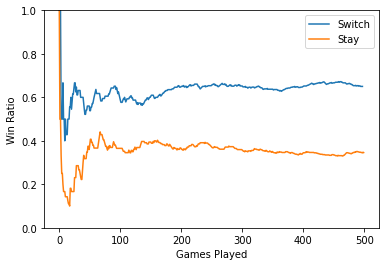

In [442]:
plt.plot(switch_win_ratio, label="Switch")
plt.plot(stay_win_ratio, label="Stay")

plt.xlabel('Games Played')
plt.ylabel('Win Ratio')

plt.ylim(0, 1)

plt.legend(loc='best')

# plt.savefig('Winning Probability', dpi=512, format=None, metadata=None,
#         bbox_inches=None, pad_inches=0.1,
#         facecolor='auto', edgecolor='auto',
#         backend=None,
#        )
plt.show()

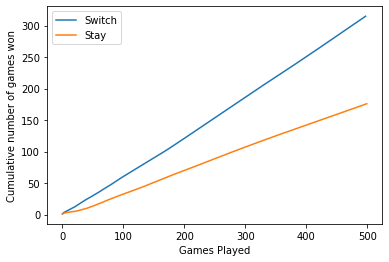

In [443]:
plt.plot(cumulative_wins_switch, label="Switch")
plt.plot(cumulative_wins_stay, label="Stay")

plt.xlabel('Games Played')
plt.ylabel('Cumulative number of games won')

plt.legend(loc='best')

# plt.savefig('Cumulative Wins', dpi=512, format=None, metadata=None,
#         bbox_inches=None, pad_inches=0.1,
#         facecolor='auto', edgecolor='auto',
#         backend=None,
#        )
plt.show()